# EDA PREDICTION

In [60]:
import json
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [61]:
def load_config():
    """load config function"""
    try:
        with open('../config/database.json', 'r') as config_file:
            return json.load(config_file)
    except Exception as e:
        print(f"Failed to load config: {e}")
        return {}


config = load_config()

user = config.get('user')
password = config.get('password')
host = config.get('host')
dbname = config.get('dbname')
port = config.get('port')
DATABASE_URL = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"

engine = create_engine(DATABASE_URL)

def load_table_data(table_name):
    try:
        df = pd.read_sql_table(table_name, con=engine)
        print(f"Load data from {table_name}")
        return df
    except Exception as e:
        print(f"Error loading data from {table_name}: {e}")
        return pd.DataFrame()  

table_name = 'prediction'
df = load_table_data(table_name)

Load data from prediction


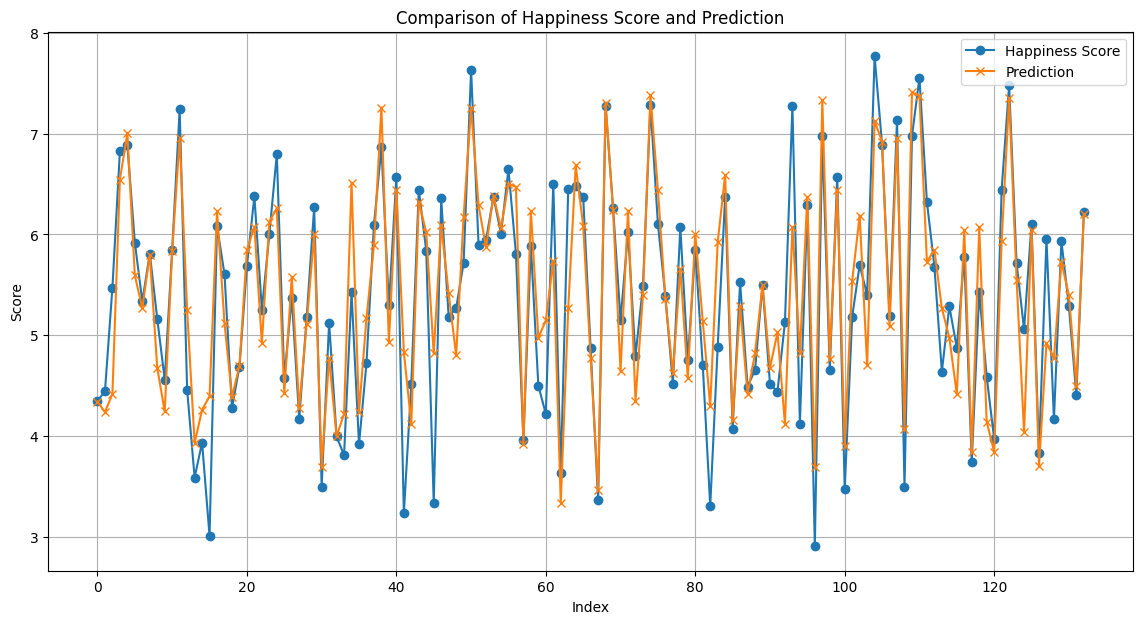

In [62]:
plt.figure(figsize=(14, 7))
plt.plot(df['HAPPINESS_SCORE'], label='Happiness Score', marker='o')
plt.plot(df['HAPPINESS_PREDICTION'], label='Prediction', marker='x')
plt.title('Comparison of Happiness Score and Prediction')
plt.xlabel('Index')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

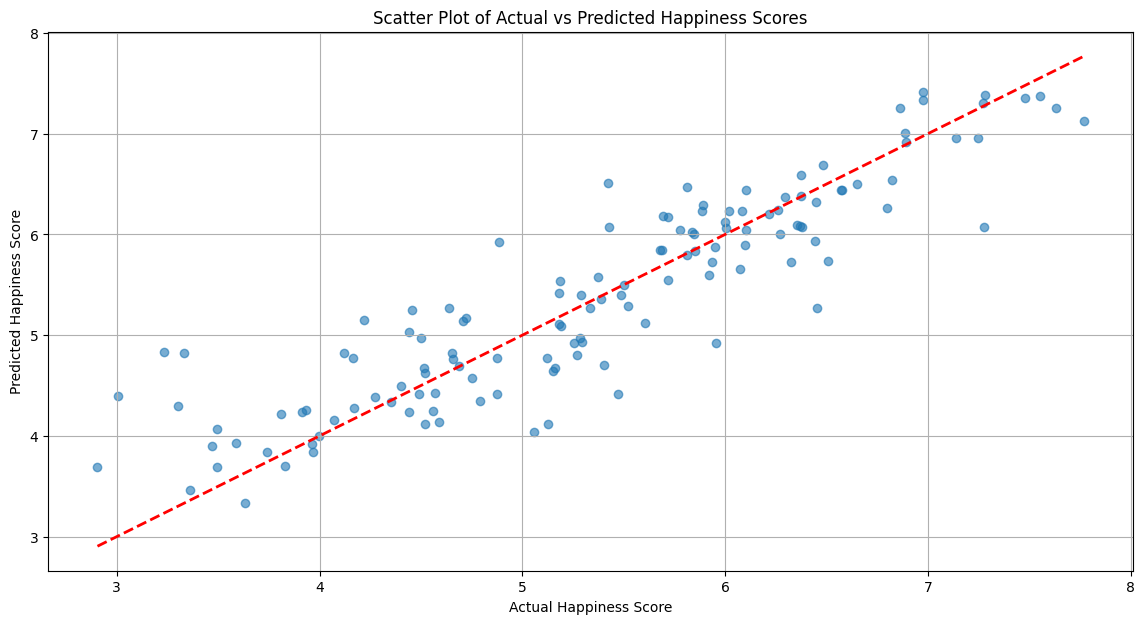

In [63]:
plt.figure(figsize=(14, 7))
plt.scatter(df['HAPPINESS_SCORE'], df['HAPPINESS_PREDICTION'], alpha=0.6)
plt.plot([df['HAPPINESS_SCORE'].min(), df['HAPPINESS_SCORE'].max()],
         [df['HAPPINESS_SCORE'].min(), df['HAPPINESS_SCORE'].max()],
         color='red', linestyle='--', linewidth=2)
plt.title('Scatter Plot of Actual vs Predicted Happiness Scores')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.grid(True)
plt.show()

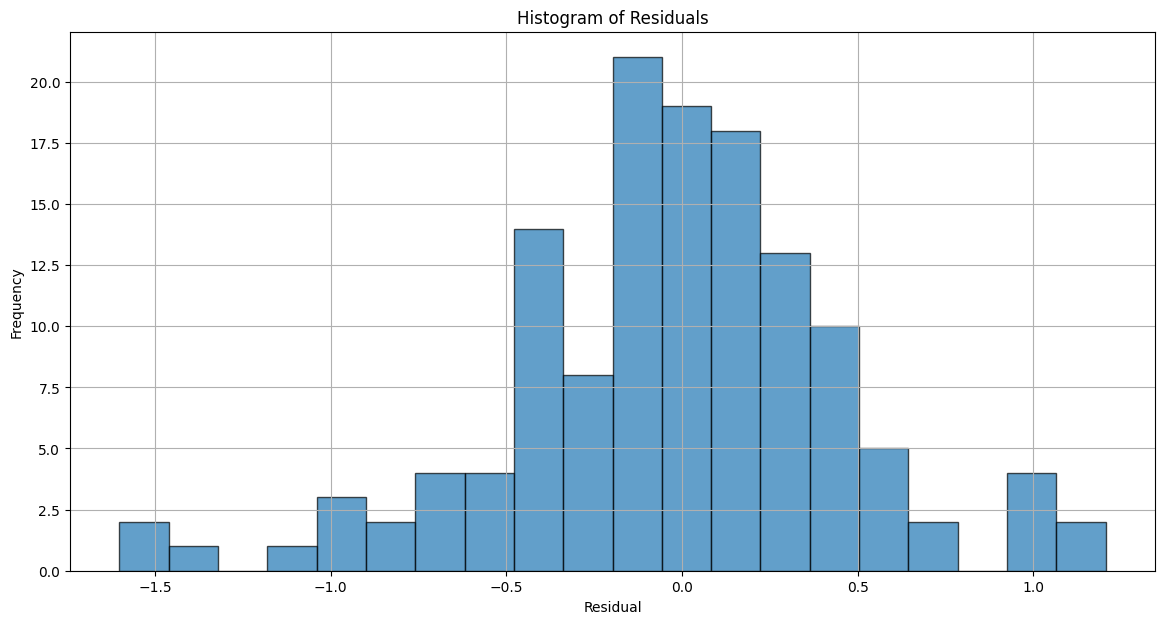

In [64]:
residuals = df['HAPPINESS_SCORE'] - df['HAPPINESS_PREDICTION']
plt.figure(figsize=(14, 7))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

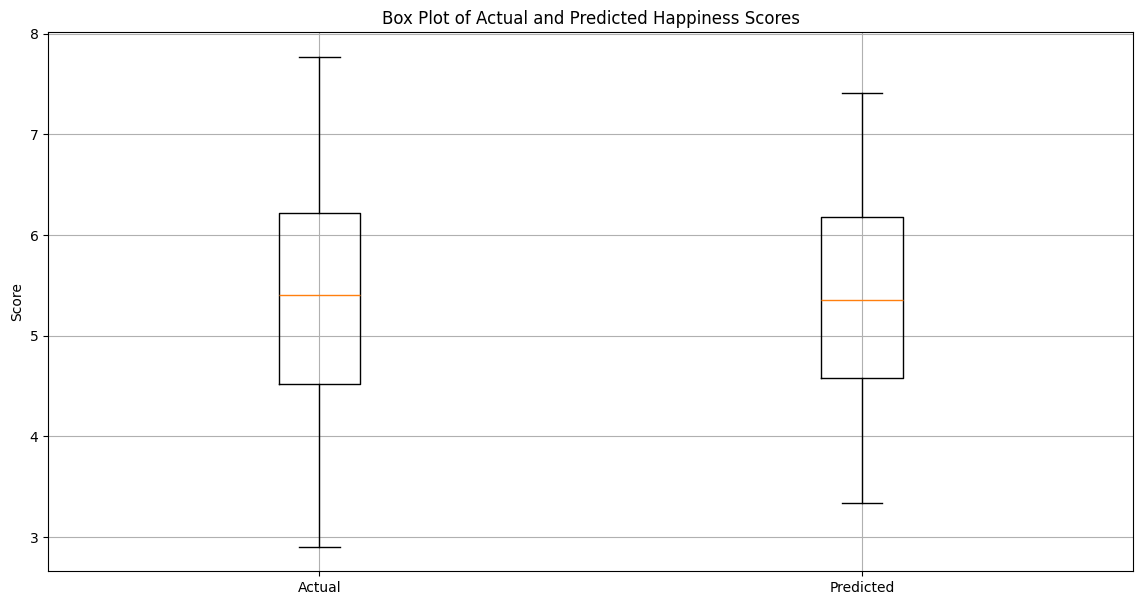

In [65]:
plt.figure(figsize=(14, 7))
plt.boxplot([df['HAPPINESS_SCORE'], df['HAPPINESS_PREDICTION']], tick_labels=['Actual', 'Predicted'])
plt.title('Box Plot of Actual and Predicted Happiness Scores')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [66]:
r2 = r2_score(df['HAPPINESS_SCORE'], df['HAPPINESS_PREDICTION'])
mae = mean_absolute_error(df['HAPPINESS_SCORE'], df['HAPPINESS_PREDICTION'])
mse = mean_squared_error(df['HAPPINESS_SCORE'], df['HAPPINESS_PREDICTION'])

print('Evaluation Metrics:')
print(f'R-squared (R²): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

Evaluation Metrics:
R-squared (R²): 0.81
Mean Absolute Error (MAE): 0.36
Mean Squared Error (MSE): 0.24
